Let's do a convolutional neural network with keras in order to detect several brain tumors based on MRI

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import pandas as pd
import cv2
import glob as gb
import os
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
code = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
#function to return the name of the categorie based on the on a hot encoding
def getcode(array) :
    n=np.argmax(array)
    for x , y in code.items() :
        if n == y :
            return x


In [ ]:
#fetching for the training data in my drive
gliomaFiles = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Training/glioma/*.jpg')
pituitaryFiles = gb.glob(pathname=  '/content/drive/MyDrive/CancerPrediction/Training/pituitary/*.jpg')
noTumorFiles = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Training/notumor/*.jpg')
meningiomaFiles = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Training/meningioma/*.jpg')

In [ ]:
#fetching for the test data in my drive
gliomaFilestest = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Testing/glioma/*.jpg')
pituitaryFilestest = gb.glob(pathname=  '/content/drive/MyDrive/CancerPrediction/Testing/pituitary/*.jpg')
noTumorFilestest = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Testing/notumor/*.jpg')
meningiomaFilestest = gb.glob(pathname= '/content/drive/MyDrive/CancerPrediction/Testing/meningioma/*.jpg')

In [ ]:
print(len(gliomaFiles))
print(len(meningiomaFiles))
print(len(noTumorFiles))
print(len(meningiomaFiles))

1321
1339
1595
1339


In [ ]:
# resizing the image and doing the one hot encoding from scratch
s = 64
X_train = []
y_train = []
for file in gliomaFiles:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append([1,0,0,0])
for file in meningiomaFiles:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append([0,1,0,0])
for file in noTumorFiles:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append([0,0,1,0])
for file in pituitaryFiles:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append([0,0,0,1])

In [ ]:
s = 64
X_test = []
y_test = []
for file in gliomaFilestest:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append([1,0,0,0])
for file in meningiomaFilestest:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append([0,1,0,0])
for file in noTumorFilestest:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append([0,0,1,0])
for file in pituitaryFilestest:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append([0,0,0,1])

In [ ]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in Y_train')

we have 5712 items in X_train
we have 5712 items in Y_train


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


(64, 64, 3)


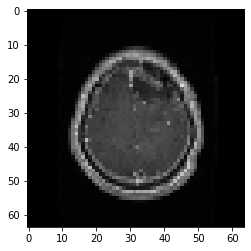

In [ ]:
#example of what our files look like
plt.imshow(X_train[6])
print(X_train[6].shape)

In [ ]:
X_train.shape

(5712, 64, 64, 3)

Now we are going to build are CNN with keras

In [ ]:

model = keras.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(64, 64, 3,), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())


model.add(layers.Dense(units=512, activation='relu'))

model.add(layers.Dense(units=4, activation='softmax'))



In [ ]:
#Allow to stop the training when the loss has not improved
callback = keras.callbacks.EarlyStopping(monitor='loss',
                                             patience=3)


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       200832    
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                      

In [ ]:
history=model.fit(X_train,y_train,batch_size=40,callbacks=[callback],epochs=32,shuffle=True, validation_data=(X_test, y_test),validation_batch_size=8)


In [ ]:
model.save("BrainTumorModel")

In [ ]:
y_pred=model.predict(X_test)

41/41 [==============================] - 38s 915ms/step


Let's visualize our results

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index =['glioma', 'meningioma', 'notumor', 'pituitary'],
                     columns = ['glioma', 'meningioma', 'notumor', 'pituitary'])

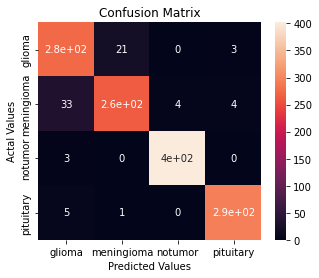

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()